In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Desktop/juliatokyo12`


In [2]:
mutable struct LCGPRNG
    seed::Int
    a::Int
    c::Int
    m::Int
end

function sample!(rng::LCGPRNG, n)
    result = Vector{Int64}(undef, n + 1)
    result[1] = rng.seed
    for i in 2:n+1
        result[i] = (rng.a * result[i-1] + rng.c) % rng.m
    end
    rng.seed = result[end]
    return result[2:end]
end

sample! (generic function with 1 method)

In [3]:
seed = 1
a = 48271  
c = 0
m = 2^31 - 1 

prng = LCGPRNG(seed, a, c, m)

LCGPRNG(1, 48271, 0, 2147483647)

In [4]:
a = sample!(prng, 100)

100-element Vector{Int64}:
      48271
  182605794
 1291394886
 1914720637
 2078669041
  407355683
 1105902161
  854716505
  564586691
 1596680831
  192302371
 1203428207
 1250328747
          ⋮
  324062450
  547639202
 1715708819
 1273555394
 1925544752
  583514338
  425095546
  580853881
  851194519
  206008598
 1391748448
 1358404307

In [5]:
using Plots
theme(:ggplot2)

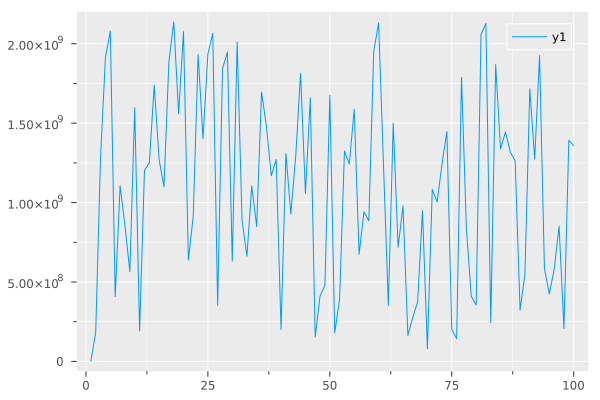

In [6]:
plot(a)

In [7]:
savefig("../../slides/img/lcg_sample.svg")

"/Users/yuchi/Desktop/juliatokyo12/slides/img/lcg_sample.svg"

In [8]:
using Random

device_rng = Random.RandomDevice()

RandomDevice()

In [9]:
using BenchmarkTools
N = 10^6

1000000

In [10]:
@benchmark sample!(prng, N)

BenchmarkTools.Trial: 924 samples with 1 evaluation.
 Range (min … max):  4.963 ms …  18.416 ms  ┊ GC (min … max): 0.00% … 1.07%
 Time  (median):     5.344 ms               ┊ GC (median):    3.85%
 Time  (mean ± σ):   5.406 ms ± 579.343 μs  ┊ GC (mean ± σ):  5.43% ± 3.12%

          █▂▅▁▂▄▇▆▅▁▁▂▃                                        
  ▃▂▃▂▁▃▃██████████████▆▅▆▅▅▄▄▄▃▃▂▂▁▂▂▂▂▃▂▃▂▁▂▁▁▂▁▂▂▂▁▂▁▂▁▁▃▂ ▄
  4.96 ms         Histogram: frequency by time        6.43 ms <

 Memory estimate: 15.26 MiB, allocs estimate: 6.

In [11]:
@benchmark rand(device_rng, N)

BenchmarkTools.Trial: 22 samples with 1 evaluation.
 Range (min … max):  230.457 ms … 236.801 ms  ┊ GC (min … max): 0.00% … 0.38%
 Time  (median):     234.812 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   234.480 ms ±   1.530 ms  ┊ GC (mean ± σ):  0.09% ± 0.17%

  ▁▁                       ▁  ▁    ▁ ▁ █▁▁ ▁█ ▁█▁ ▁ ▁ ▁▁      ▁  
  ██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁█▁▁▁▁█▁█▁███▁██▁███▁█▁█▁██▁▁▁▁▁▁█ ▁
  230 ms           Histogram: frequency by time          237 ms <

 Memory estimate: 7.63 MiB, allocs estimate: 3.

In [12]:
sample2d!(rng::LCGPRNG) = sample!(rng, 2) ./ rng.m
sample3d!(rng::LCGPRNG) = sample!(rng, 3) ./ rng.m

sample3d! (generic function with 1 method)

In [13]:
seed = 1
a = 45
c = 1
m = 256

prng = LCGPRNG(seed, a, c, m)

LCGPRNG(1, 45, 1, 256)

In [42]:
x = Float64[]
y = Float64[]

N = 100

for i in 1:N
    _x, _y = sample2d!(prng)
    push!(x, _x)
    push!(y, _y)
end

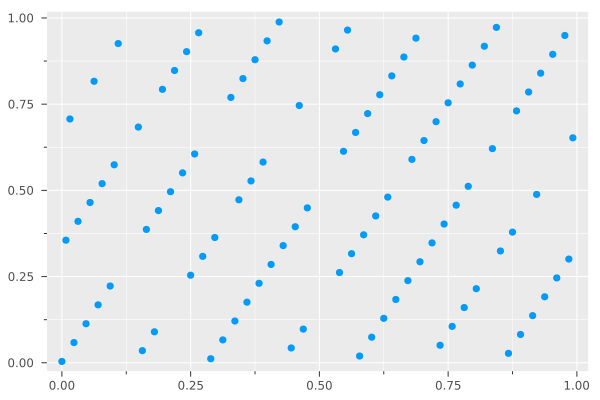

In [43]:
scatter(x, y, label="")

In [44]:
savefig("../../slides/img/lcg_lattice_2d.svg")

"/Users/yuchi/Desktop/juliatokyo12/slides/img/lcg_lattice_2d.svg"

In [16]:
x = Float64[]
y = Float64[]
z = Float64[]

N = 1000

for i in 1:N
    _x, _y, _z = sample3d!(prng)
    push!(x, _x)
    push!(y, _y)
    push!(z, _z)
end

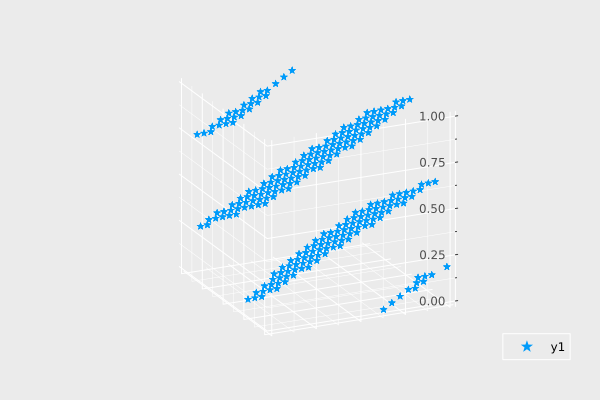

In [37]:
scatter(x, y, z, camera=(245, 20), background="#EBEBEB", shape=:s, xaxis=false, yaxis=false)

In [40]:
savefig("../../slides/img/lcg_lattice.svg")

"/Users/yuchi/Desktop/juliatokyo12/slides/img/lcg_lattice.svg"

[ Info: Saved animation to /Users/yuchi/Desktop/juliatokyo12/slides/img/lcg_lattice.gif


Plots.AnimatedGif("/Users/yuchi/Desktop/juliatokyo12/slides/img/lcg_lattice.gif")
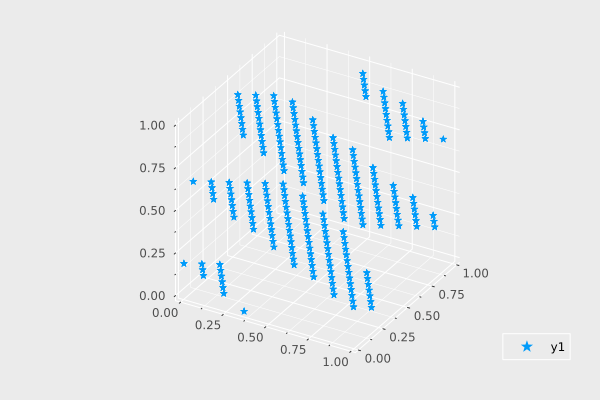

In [41]:
anim = Animation()

for θ in 30:10:390
    p = scatter(x, y, z, camera=(θ, 30), background="#EBEBEB", shape=:s)
    frame(anim, p)
end 

gif(anim, "../../slides/img/lcg_lattice.gif", fps=5)